In [1]:
##### Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
# Read in csv
file1 = "../resources/IPEDS_data.csv"
univ_stats = pd.read_csv(file1)
univ_stats.head()


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
my_list = list(univ_stats)
my_list

['ID number',
 'Name',
 'year',
 'ZIP code',
 'Highest degree offered',
 'County name',
 'Longitude location of institution',
 'Latitude location of institution',
 'Religious affiliation',
 'Offers Less than one year certificate',
 'Offers One but less than two years certificate',
 "Offers Associate's degree",
 'Offers Two but less than 4 years certificate',
 "Offers Bachelor's degree",
 'Offers Postbaccalaureate certificate',
 "Offers Master's degree",
 "Offers Post-master's certificate",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 "Offers Doctor's degree - other",
 'Offers Other degree',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentil

In [4]:
# Selecting the relevant columns for the data frame
HBCU_ar = univ_stats.filter(['Name', 'Historically Black College or University', 'Applicants total', 'Admissions total'], axis=1)

# Deleting all rows that did not pertain the value Yes under the Historically Black College or University column
HBCU_filtered = HBCU_ar[HBCU_ar['Historically Black College or University'] == 'Yes']

# Dropped all rows that contained NaN values
HBCU_filtered1 = HBCU_filtered.dropna()

# Added the new column Acceptance rate and formatted the output by percentage 
HBCU_filtered1['Acceptance rate'] = ((HBCU_filtered1['Admissions total']/HBCU_filtered1['Applicants total']) * 100).round(2)

# Set the column name as the index
HBCU_filtered1.set_index('Name')


<ipython-input-4-f30c95c6f9b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HBCU_filtered1['Acceptance rate'] = ((HBCU_filtered1['Admissions total']/HBCU_filtered1['Applicants total']) * 100).round(2)


,Historically Black College or University,Applicants total,Admissions total,Acceptance rate
Name,,,,
Alabama A & M University,Yes,6142.0,5521.0,89.89
Alabama State University,Yes,10245.0,5251.0,51.25
Oakwood University,Yes,2728.0,937.0,34.35
Stillman College,Yes,4121.0,1772.0,43.00
Tuskegee University,Yes,10022.0,3519.0,35.11
...,...,...,...,...
Norfolk State University,Yes,3373.0,2192.0,64.99
Virginia State University,Yes,5729.0,5419.0,94.59
Virginia Union University,Yes,4306.0,2518.0,58.48


In [5]:
# Selecting the relevant columns for the data frame
HBCU_er = univ_stats.filter(['Name', 'Historically Black College or University', 'Enrolled total', 'Admissions total'], axis=1)

# Deleting all rows that did not pertain the value Yes under the Historically Black College or University column
HBCU_er_filtered = HBCU_er[HBCU_er['Historically Black College or University'] == 'Yes']

# Dropped all rows that contained NaN values
HBCU_filtered2 = HBCU_er_filtered.dropna()

# Added the new column Acceptance rate and formatted the output by percentage 
HBCU_filtered2['Enrollment rate'] = ((HBCU_filtered2['Enrolled total']/HBCU_filtered2['Admissions total']) * 100).round(2)

# Set the column name as the index
HBCU_filtered2.set_index('Name')


<ipython-input-5-a4ddeb9b05a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HBCU_filtered2['Enrollment rate'] = ((HBCU_filtered2['Enrolled total']/HBCU_filtered2['Admissions total']) * 100).round(2)


,Historically Black College or University,Enrolled total,Admissions total,Enrollment rate
Name,,,,
Alabama A & M University,Yes,1104.0,5521.0,20.00
Alabama State University,Yes,1479.0,5251.0,28.17
Oakwood University,Yes,409.0,937.0,43.65
Stillman College,Yes,257.0,1772.0,14.50
Tuskegee University,Yes,650.0,3519.0,18.47
...,...,...,...,...
Norfolk State University,Yes,829.0,2192.0,37.82
Virginia State University,Yes,1244.0,5419.0,22.96
Virginia Union University,Yes,404.0,2518.0,16.04


In [6]:
HBCU_tests = univ_stats.filter(['Name', 'Historically Black College or University', 'Tuition and fees, 2013-14', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
                                'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
                                'ACT Composite 25th percentile score,' 'ACT Composite 75th percentile score'], axis=1)

HBCU_tests_filtered = HBCU_tests[HBCU_tests['Historically Black College or University'] == 'Yes']

# Dropped all rows that contained NaN values
HBCU_tests_filtered1 = HBCU_tests_filtered.dropna()

HBCU_tests_filtered1

,Name,Historically Black College or University,"Tuition and fees, 2013-14",SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score
0,Alabama A & M University,Yes,7182.0,370.0,450.0,350.0,450.0
4,Alabama State University,Yes,8720.0,380.0,480.0,370.0,480.0
20,Oakwood University,Yes,16234.0,410.0,513.0,400.0,510.0
24,Stillman College,Yes,15901.0,350.0,450.0,383.0,438.0
27,Tuskegee University,Yes,18900.0,400.0,510.0,400.0,520.0
44,University of Arkansas at Pine Bluff,Yes,5938.0,330.0,430.0,348.0,493.0
180,Delaware State University,Yes,7336.0,410.0,480.0,410.0,490.0
190,Howard University,Yes,22683.0,490.0,590.0,480.0,590.0
193,Bethune-Cookman University,Yes,14410.0,370.0,460.0,360.0,450.0
199,Edward Waters College,Yes,11525.0,350.0,440.0,360.0,440.0


In [7]:
high_scores = HBCU_tests_filtered1.loc[(HBCU_tests_filtered1['SAT Critical Reading 75th percentile score'] >= 520) & (HBCU_tests_filtered1['SAT Math 75th percentile score'] >= 520) ]

high_scores['Acceptance rate'] = HBCU_filtered1['Acceptance rate']
high_scores['Enrollment rate'] = HBCU_filtered2['Enrollment rate']

top_HBCUs = high_scores.filter(['Name', 'Acceptance rate', 'Enrollment rate'])

top_HBCUs.set_index('Name')

<ipython-input-7-031e0264248d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_scores['Acceptance rate'] = HBCU_filtered1['Acceptance rate']
<ipython-input-7-031e0264248d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_scores['Enrollment rate'] = HBCU_filtered2['Enrollment rate']


,Acceptance rate,Enrollment rate
Name,,
Howard University,49.30,24.19
Morehouse College,66.84,27.14
Spelman College,38.02,22.62
Southern University at New Orleans,48.88,89.53
Xavier University of Louisiana,54.43,26.37
Hampton University,36.05,18.16


In [8]:
THBCU_avg_accpt = top_HBCUs['Acceptance rate'].mean()
THBCU_avg_accpt


48.919999999999995

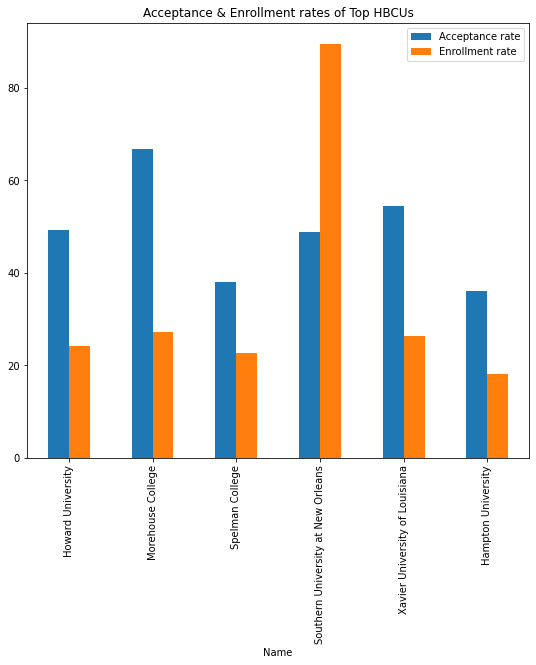

In [9]:
high_scores.plot(x ='Name', y=['Acceptance rate', 'Enrollment rate'], kind='bar', figsize=(9,8), title="Acceptance & Enrollment rates of Top HBCUs")


plt.savefig('../code/static/images/high_scores.png')
plt.show()

In [10]:
std_tests = univ_stats.filter(['Name', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
                                'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
                                'ACT Composite 25th percentile score,' 'ACT Composite 75th percentile score'], axis=1)

# Dropped all rows that contained NaN values
std_tests_filtered = std_tests.dropna()

high_std_scores = std_tests_filtered.loc[(std_tests_filtered['SAT Critical Reading 75th percentile score'] >= 780) & (std_tests_filtered['SAT Math 75th percentile score'] >= 780)]

high_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
high_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)

top_univ = high_std_scores.filter(['Name', 'Acceptance rate', 'Enrollment rate'])
top_univ.set_index('Name')


<ipython-input-10-fa52e7d8528f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
<ipython-input-10-fa52e7d8528f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)


,Acceptance rate,Enrollment rate
Name,,
California Institute of Technology,10.55,42.64
Yale University,7.05,66.37
University of Chicago,8.81,53.41
Harvard University,5.84,81.05
Williams College,17.02,45.47
Dartmouth College,9.78,48.58
Princeton University,7.41,65.46
Columbia University in the City of New York,7.42,59.91
Vanderbilt University,12.74,40.70


In [11]:
TUniv_avg_accpt = top_univ['Acceptance rate'].mean()
TUniv_avg_accpt


9.230999999999998

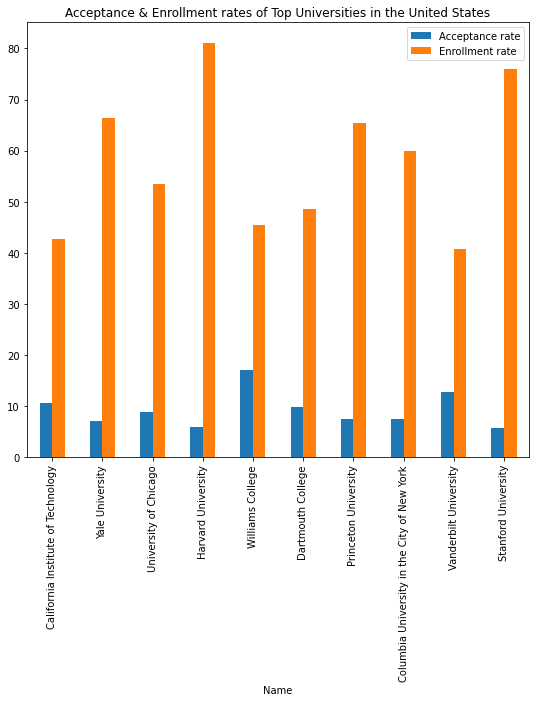

In [12]:
top_univ.plot(x ='Name', y=['Acceptance rate', 'Enrollment rate'], kind='bar', figsize=(9,8), title="Acceptance & Enrollment rates of Top Universities in the United States")


plt.savefig('../code/static/images/top_univ.png')
plt.show()

In [13]:
ga_tests = univ_stats.filter(['Name', 'State abbreviation', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
                                'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
                                'ACT Composite 25th percentile score,' 'ACT Composite 75th percentile score'], axis=1)

# Dropped all rows that contained NaN values
ga_tests_filtered = ga_tests.dropna()

ga_std_scores = ga_tests_filtered.loc[(ga_tests_filtered['SAT Critical Reading 75th percentile score'] >= 600) & (ga_tests_filtered['SAT Math 75th percentile score'] >= 600)]

ga_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
ga_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)
                                                                
st = ga_std_scores.groupby('State abbreviation')
sr = st.get_group('Georgia')
sr1 = sr.filter(['Name', 'Acceptance rate', 'Enrollment rate'])
sr1.set_index('Name')

<ipython-input-13-ce45107817f4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
<ipython-input-13-ce45107817f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)


,Acceptance rate,Enrollment rate
Name,,
Berry College,60.32,28.56
Covenant College,57.04,41.61
Emory University,26.33,29.62
Georgia Institute of Technology-Main Campus,54.93,37.84
Georgia College and State University,67.98,50.54
University of Georgia,56.08,47.68
Mercer University,69.00,27.31
Oglethorpe University,55.76,11.49
Southern Polytechnic State University,77.98,60.52


In [14]:
Tsr1_avg_accpt = sr1['Acceptance rate'].mean()
Tsr1_avg_accpt


58.379999999999995

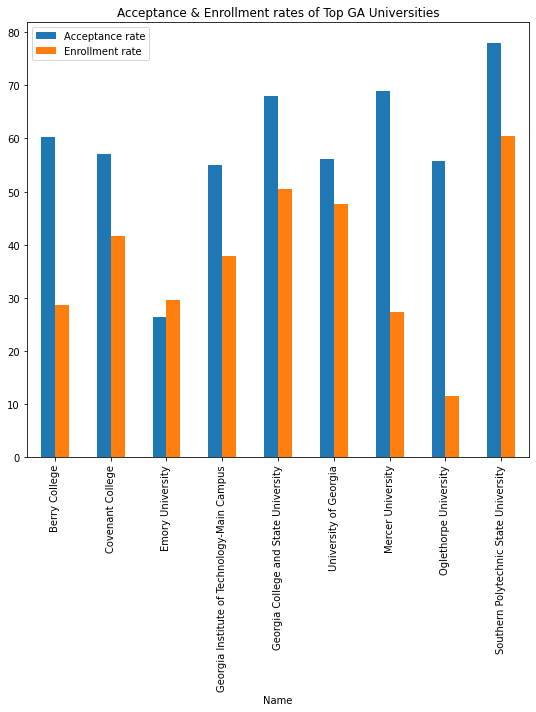

In [15]:
sr1.plot(x ='Name', y=['Acceptance rate', 'Enrollment rate'], kind='bar', figsize=(9,8), title="Acceptance & Enrollment rates of Top GA Universities")
                      
plt.savefig('../code/static/images/sr1.png')
plt.show()

In [16]:
# Selecting the relevant columns for the data frame
tuition = univ_stats.filter(['Name', 'Tuition and fees, 2013-14'], axis=1)

# # Deleting all rows that did not pertain the value Yes under the Historically Black College or University column
# HBCU_er_filtered = HBCU_er[HBCU_er['Historically Black College or University'] == 'Yes']

# # Dropped all rows that contained NaN values
tuition1 = tuition.dropna()

tuition1.sort_values('Tuition and fees, 2013-14', axis=0, ascending = True, inplace = True)

# Added the new column Acceptance rate and formatted the output by percentage 
tuition1['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)

# Set the column name as the index
tuition1.set_index('Name')
tuition1.tail(10)

<ipython-input-16-1bf4466bedad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition1.sort_values('Tuition and fees, 2013-14', axis=0, ascending = True, inplace = True)
<ipython-input-16-1bf4466bedad>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition1['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)


,Name,"Tuition and fees, 2013-14",Enrollment rate
1068,Bucknell University,46902.0,39.79
477,Tulane University of Louisiana,46930.0,20.21
177,Wesleyan University,47244.0,35.78
188,George Washington University,47343.0,33.17
176,Trinity College,47510.0,24.84
289,University of Chicago,47514.0,53.41
1072,Carnegie Mellon University,47642.0,29.96
897,Vassar College,47890.0,36.35
858,Sarah Lawrence College,48696.0,25.77
793,Columbia University in the City of New York,49138.0,59.91


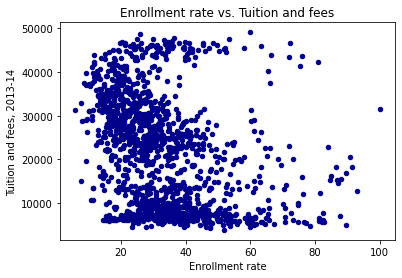

In [17]:
ax1 = tuition1.plot.scatter(x='Enrollment rate',
                      y='Tuition and fees, 2013-14',
                      c='DarkBlue', title = 'Enrollment rate vs. Tuition and fees')
                            
plt.savefig('../code/static/images/tuiition1.png')
plt.show()